### C S 329E HW 4

## Pair Programming Group Number: HW4 Pair 3
## Members of Team: Pamela Nguyen and Daniel Carlson

## Decision Tree Classifier


For this weeks homework we are going to explore ideas around decision tree implementation!  

We will implement some helper functions that would be necessary for a home-grown tree:
  - calc_entropy
  - calc_gini
  
and them test them out at given data splits. 
  
And finally, to perform predictive and descriptive analytics we use the [Decision Tree Classifier](https://scikit-learn.org/stable/modules/tree.html#classification) class in the scikit-learn package.

  
For this assignment, the stopping condition will be the depth of the tree. The impurity measure can be either `Entropy` or `Gini`.

To test our tree built from the Decision Tree Classifier class, we will revisit our Melbourne housing data (that has been cleaned and pruned) and use the files:

   - `melb_tree_train.csv` for training the decision tree (we'll also see what happens if we use the same data to test as we used to train the data in the last problem)
   - `melb_tree_test.csv` for testing the decision tree

There are 10 features in these dataframes that we can use to describe and predict the class label housing "Type", which is 'h' house, 'u' duplex, or 't' townhome. 

In [ ]:
#pip install sklearn
#pip install graphviz

In [ ]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import log2
from sklearn import tree # you'll probably need to install this - look at Q6 for a link 
import graphviz # you'll probably need to install this - look at Q6 for a link 

In [ ]:
df_tree_train = pd.read_csv('https://gist.githubusercontent.com/yanyanzheng96/f8ba57f8377dee0810271475c728fca8/raw/afa3fa4305b55e31135980835d40b27af31f288c/melb_tree_train.csv')
df_tree_train.head())

,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea
0,2,t,771000.0,13.8,2.0,1.0,1.0,0.0,99.0,1992.0,Bayside
1,3,t,700000.0,7.9,3.0,2.0,1.0,189.0,110.0,1990.0,Banyule
2,3,u,975000.0,12.1,3.0,2.0,1.0,277.0,109.0,1975.0,Glen Eira
3,3,h,1290000.0,8.0,3.0,1.0,1.0,618.0,132.0,1960.0,Moonee Valley
4,2,u,500000.0,4.2,2.0,1.0,1.0,0.0,86.0,2000.0,Melbourne


In [ ]:
df_tree_test = pd.read_csv('https://gist.githubusercontent.com/yanyanzheng96/ec66da011b165f0e282c0c1f8447010e/raw/d02c3829a7e9db2d156ba1ab9d5bb4d18ae57be8/melb_tree_test.csv')
df_tree_test.head()

,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea
0,2,t,930000.0,2.6,2.0,1.0,1.0,97.0,85.0,2004.0,Yarra
1,3,t,815000.0,11.0,3.0,2.0,2.0,159.0,130.0,2014.0,Hobsons Bay
2,4,h,638000.0,13.0,4.0,2.0,1.0,624.0,258.0,2005.0,Moreland
3,2,t,595000.0,11.2,2.0,2.0,1.0,201.0,111.0,2005.0,Moreland
4,3,t,620500.0,11.2,3.0,2.0,1.0,158.0,117.0,2011.0,Darebin


## Q1 Load the Data
Load in the melb_tree_train.csv into a dataframe, and split that dataframe into `df_X`, which contains the features of the data set (everything but `Type`), and `s_y`, the series containing just the class label (just `Type`). The lengths of `df_X` and `s_y` should match.

In [ ]:
df_tree_train = pd.read_csv('https://gist.githubusercontent.com/yanyanzheng96/f8ba57f8377dee0810271475c728fca8/raw/afa3fa4305b55e31135980835d40b27af31f288c/melb_tree_train.csv')

df_x = df_tree_train.drop(['Type'], axis=1)
df_y = df_tree_train['Type']

# print(len(df_x))
# print(len(df_y))
#print(df_y)

## Q2 Implement a function to calculate entropy 
Implement a function `calc_entropy` that takes the the class label series, `s_y`, as a parameter. Implement using the definition on p128 in the DM book and only use pandas and log2 libraries

In [ ]:
# calc_entropy(s_y) definition
def calc_entropy(s_y):
  values = s_y.value_counts()
  total = len(s_y)
  entropy = 0
  for i in values:
    p = i/total
    entropy = entropy-(p*log2(p))

  #p_i = s_y.value_counts(normalize=True) #normalize = count/population
  #return p_i.apply(lambda x: x*log2(x).sum())
  return entropy

## Q3 Use the entropy function to
  - (a) Calculate the entropy of the entire training set
  - (b) Calculate the entropy of the three partitions formed from the following three intervals:

(i) Landsize $\in [0,200]$

(ii) Landsize $\in (200,450]$

(iii) Landsize $\in (450, \infty)$

In [ ]:
# The entire data set
for col, data in df_tree_train.iteritems():
  print(col)
  print(calc_entropy(data))

Rooms
1.821918078739081
Type
1.5825333114261775
Price
8.68398747362555
Distance
6.448063314695031
Bedroom2
1.8075569567840506
Bathroom
1.3100410147829409
Car
1.5056030610474453
Landsize
7.335713110058888
BuildingArea
7.371594636957557
YearBuilt
5.252181718331279
CouncilArea
4.107927873665826


In [ ]:
# Less than or equal to 200
landsize0 = df_tree_train[df_tree_train['Landsize'] <= 200]
print(calc_entropy(landsize0))

8.573647187493352


In [ ]:
# Between 200 and 450
landsize200 = df_tree_train[(df_tree_train['Landsize'] > 200) & (df_tree_train['Landsize'] <= 450)]
print(calc_entropy(landsize200))

7.787902559391411


In [ ]:
# greater than 450
landsize450 = df_tree_train[df_tree_train['Landsize'] >= 450]
print(calc_entropy(landsize450))

7.700439718141067


## Q4 Implement a function to calculate the Gini Index
Implement the function `calc_gini` that takes the class label series, `s_y`, as a parameter. Implement using the definition on p128 in the DM book and only use the pandas library.

In [ ]:
def calc_gini( s_y ):
  values = s_y.value_counts()
  total = len(s_y)
  gini = 0
  for i in values:
    p = i/total
    gini = gini+pow(p,2)
  gini = 1-gini
  return gini

## Q5 Use the Gini Index function to
  - (a) Calculate the Gini index of the entire training set
  - (b) Calculate the Gini index of the three partitions formed from the following three intervals:

(i) Landsize $\in [0,200]$

(ii) Landsize $\in (200,450]$

(iii) Landsize $\in (450, \infty)$

In [ ]:
# The entire data set
for col, data in df_tree_train.iteritems():
  print(col)
  print(calc_gini(data))

Rooms
0.6654595336076816
Type
0.6655601280292638
Price
0.9969608291418991
Distance
0.9837158969669257
Bedroom2
0.6635208047553727
Bathroom
0.5469288218259412
Car
0.5764730986130162
Landsize
0.9432190214906269
BuildingArea
0.9921780216430423
YearBuilt
0.9608017070568511
CouncilArea
0.9341594269166286


In [ ]:
# Less than or equal to 200
landsize0 = df_tree_train[df_tree_train['Landsize'] <= 200]
print(calc_gini(landsize0))

0.9973753280839895


In [ ]:
# Between 200 and 450
landsize200 = df_tree_train[(df_tree_train['Landsize'] > 200) & (df_tree_train['Landsize'] <= 450)]
print(calc_gini(landsize200))

0.995475113122172


In [ ]:
# greater than 450
landsize450 = df_tree_train[df_tree_train['Landsize'] >= 450]
print(calc_gini(landsize450))

0.9951923076923077


## Q6 Create a decision tree 
Using [scikit-learn](https://scikit-learn.org/stable/modules/tree.html#tree) create a multi class classifer for the data set using the Entropy impurity measure and a max depth of 3.

Note that scikit-learn's algorithm doesn't handle categorical data, so that needs to be preprocessed using an one hot encoding.

Display the tree using `export_text` from sklearn.tree, and use that information to write some descriptive analytics on the classification of houses.  For extra fun, use the export_graphviz to draw the graph (see documentation on the [scikit-learn webpage](https://scikit-learn.org/stable/modules/tree.html#classification)). 

In [ ]:
# Convert categorical data via One hot encoding
dummies_x = pd.get_dummies(df_x['CouncilArea'])
df_x = df_x.drop('CouncilArea',axis=1)
df_x = pd.concat([df_x,dummies_x],axis=1)
#df_x = pd.concat(df_X,pd.get
X = df_x
Y = pd.get_dummies(df_y)

In [ ]:
# Create Tree
clf2 = tree.DecisionTreeClassifier(criterion = "entropy", max_depth=3)
clf2 = clf2.fit(X,Y)
y_pred2 = pd.DataFrame(clf2.predict(X), columns=['h','t','u'])

clf = tree.DecisionTreeClassifier(criterion = "entropy", max_depth=3)
clf = clf.fit(X,df_y)
y_pred = clf.predict(X)

#labels=dict({'h':[1,0,0],'t':[0,1,0],'u':[0,0,1]})

In [ ]:
# Tabulate errors
uncommon_rows = len(Y[(Y != y_pred2).any(1)])
total_rows = len(Y)
error = uncommon_rows/total_rows
print(F'Uncommon Rows: {uncommon_rows} | Error = {error}')

Uncommon Rows: 182 | Error = 0.22469135802469137


In [ ]:
# Display text version of the tree
features = list(X.columns)
targets = list(Y.columns)
r = tree.export_text(clf, feature_names=features)
print(r)

|--- YearBuilt <= 1977.50
|   |--- Rooms <= 2.50
|   |   |--- Price <= 915000.00
|   |   |   |--- class: u
|   |   |--- Price >  915000.00
|   |   |   |--- class: h
|   |--- Rooms >  2.50
|   |   |--- Landsize <= 429.00
|   |   |   |--- class: h
|   |   |--- Landsize >  429.00
|   |   |   |--- class: h
|--- YearBuilt >  1977.50
|   |--- BuildingArea <= 104.31
|   |   |--- Landsize <= 76.00
|   |   |   |--- class: u
|   |   |--- Landsize >  76.00
|   |   |   |--- class: t
|   |--- BuildingArea >  104.31
|   |   |--- Landsize <= 391.00
|   |   |   |--- class: t
|   |   |--- Landsize >  391.00
|   |   |   |--- class: h



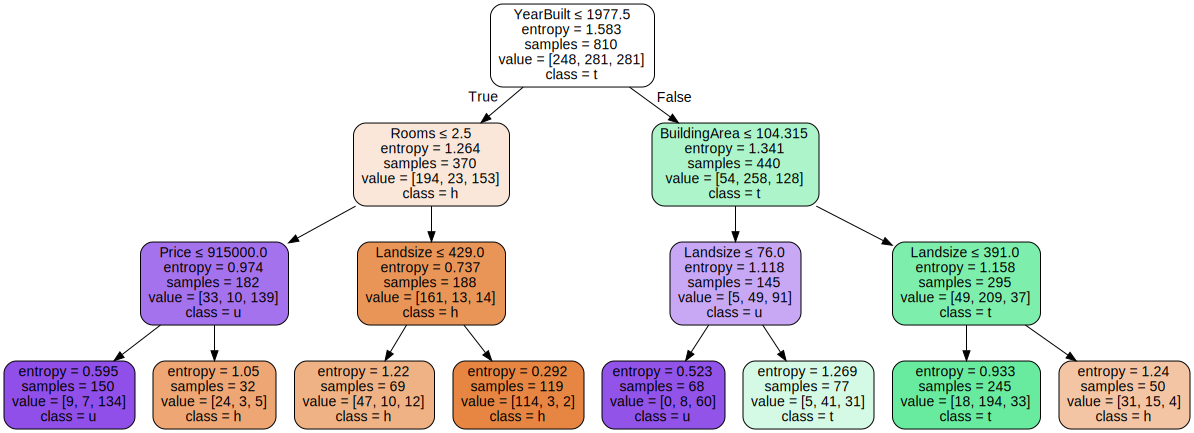

In [ ]:
# Display graphviz version of the tree
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=features,
                                class_names=['h','t','u'], 
                                label='all',
                                filled=True, rounded=True, 
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

➡️ Answer containing your descriptive analytics in markdown here ⬅️

A decision tree predicts the class labels: 'h','t', 'u'. This the graphviz tree above, based on our features, we can determine the class housing label. This model can also help us determine the characteristics that make a house, duplex, or townhouse. For example: a house is classified as a 't' if if the yearbuilt is not less than or equal to 1977.5. 

---

| Year Built | Rooms | Price | Landsize | Building Area | Class |
| --- | --- | --- | --- | --- | --- |
| <= 1977.5 | <= 2.5 | <= 915,000 | Any | Any | u |
| <= 1977.5 | <= 2.5 | > 915,000 | Any | Any | h |
| <= 1977.5 | > 2.5 | Any | Any | Any | h |
| > 1977.5 | Any | Any | <= 76 | <= 104.315 | u |
| > 1977.5 | Any | Any | > 76 | <= 104.315 | t |
| > 1977.5 | Any | Any | <= 391 | > 104.315 | t |
| > 1977.5 | Any | Any | > 391 | > 104.315 | h |


## Q7 Calculate the Accuracy and Display Learning Curve
Load in the test data from melb_tree_test.csv.

Use the scikit-learn library to create many decision trees, each one with a different configuration (aka Hyperparameters).  You will create 28 different trees by:

    - Varying the max depth from 2 to 15 with the Gini Index as the impurity measure
    - Varying the max depth from 2 to 15 with the Entropy as the impurity measure

Implementation tip: you can create an array of numbers from 2 to 15 by using the numpy function [arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html).

For each of the 28 decistion trees, calculate the error rate by using the data in the: 
  - Training set, and
  - Test set.

Display the results graphicaly, and offer an analysis of the trend (or if no trend present, offer a hypotheisis of why).  The max depth should be on the x-axis, and the error rate should be on the y-axis (see figure 3.23 in your DM textbook for a similar style of graph that uses leaf nodes instead of depth for the x-axis). Your plot will include 4 series of data
   - Test error (entropy)
   - Test error (gini index)
   - Training error (entropy)
   - Training error (gini index)

In [ ]:
# Load in the test data
df_tree_test = pd.read_csv('https://gist.githubusercontent.com/yanyanzheng96/ec66da011b165f0e282c0c1f8447010e/raw/d02c3829a7e9db2d156ba1ab9d5bb4d18ae57be8/melb_tree_test.csv')

In [ ]:
def get_tree(depth, X, Y,df_y, crit):
  # calculate errors
  clf2 = tree.DecisionTreeClassifier(criterion = crit, max_depth=depth)
  clf2 = clf2.fit(X,Y)
  y_pred2 = pd.DataFrame(clf2.predict(X), columns=['h','t','u'])
  uncommon_rows = len(Y[(Y != y_pred2).any(1)])
  total_rows = len(Y)
  error = uncommon_rows/total_rows
  print(F'Uncommon Rows: {uncommon_rows} | Error = {error}')

  # get tree
  clf = tree.DecisionTreeClassifier(criterion = crit, max_depth=depth)
  clf = clf.fit(X,df_y)
  y_pred = clf.predict(X)
  
  return clf, error

def get_xy(data):
  df_x = data.drop(['Type'], axis=1)
  df_y = data['Type']

  # Convert categorical data via One hot encoding
  dummies_x = pd.get_dummies(df_x['CouncilArea'])
  df_x = df_x.drop('CouncilArea',axis=1)
  df_x = pd.concat([df_x,dummies_x],axis=1)
  X = df_x
  Y = pd.get_dummies(df_y) 
  features = list(X.columns)
  targets = list(Y.columns)
  return X,Y,df_y,features,targets

In [ ]:
# Build the trees using the training data

X_train,Y_train,df_y_train, features_train, targets_train = get_xy(df_tree_train)
print(len(X_train), len(Y_train))
X_test,Y_test, df_y_test, features_test, targets_test = get_xy(df_tree_test)

810 810


In [ ]:
# Create test tree using Entropy
error_train_entropy, error_train_gini, error_test_entropy, error_test_gini = np.array([]),np.array([]),np.array([]),np.array([])

# Training Error using Entropy
for depth in range(2,16,1):
  print(F'Max Depth: {depth} | Criterion: Entropy')
  clf_train, error = get_tree(depth, X_train, Y_train, df_y_train, "entropy")
  error_train_entropy=np.append(error_train_entropy,error)
  r = tree.export_text(clf_train, feature_names=features)
  print(r)

Max Depth: 2 | Criterion: Entropy
Uncommon Rows: 214 | Error = 0.2641975308641975
|--- YearBuilt <= 1977.50
|   |--- Rooms <= 2.50
|   |   |--- class: u
|   |--- Rooms >  2.50
|   |   |--- class: h
|--- YearBuilt >  1977.50
|   |--- BuildingArea <= 104.31
|   |   |--- class: u
|   |--- BuildingArea >  104.31
|   |   |--- class: t

Max Depth: 3 | Criterion: Entropy
Uncommon Rows: 182 | Error = 0.22469135802469137
|--- YearBuilt <= 1977.50
|   |--- Rooms <= 2.50
|   |   |--- Price <= 915000.00
|   |   |   |--- class: u
|   |   |--- Price >  915000.00
|   |   |   |--- class: h
|   |--- Rooms >  2.50
|   |   |--- Landsize <= 429.00
|   |   |   |--- class: h
|   |   |--- Landsize >  429.00
|   |   |   |--- class: h
|--- YearBuilt >  1977.50
|   |--- BuildingArea <= 104.31
|   |   |--- Landsize <= 76.00
|   |   |   |--- class: u
|   |   |--- Landsize >  76.00
|   |   |   |--- class: t
|   |--- BuildingArea >  104.31
|   |   |--- Landsize <= 391.00
|   |   |   |--- class: t
|   |   |--- Lands

In [ ]:
# Training Error using Gini
for depth in range(2,16,1):
  print(F'Max Depth: {depth} | Criterion: Gini')
  clf_train, error = get_tree(depth, X_train, Y_train, df_y_train, "gini")
  error_train_gini=np.append(error_train_gini,error)
  r = tree.export_text(clf_train, feature_names=features)
  print(r)

Max Depth: 2 | Criterion: Gini
Uncommon Rows: 202 | Error = 0.24938271604938272
|--- BuildingArea <= 99.50
|   |--- Price <= 840500.00
|   |   |--- class: u
|   |--- Price >  840500.00
|   |   |--- class: h
|--- BuildingArea >  99.50
|   |--- YearBuilt <= 1976.50
|   |   |--- class: h
|   |--- YearBuilt >  1976.50
|   |   |--- class: t

Max Depth: 3 | Criterion: Gini
Uncommon Rows: 201 | Error = 0.24814814814814815
|--- BuildingArea <= 99.50
|   |--- Price <= 840500.00
|   |   |--- BuildingArea <= 83.50
|   |   |   |--- class: u
|   |   |--- BuildingArea >  83.50
|   |   |   |--- class: u
|   |--- Price >  840500.00
|   |   |--- YearBuilt <= 1965.00
|   |   |   |--- class: h
|   |   |--- YearBuilt >  1965.00
|   |   |   |--- class: u
|--- BuildingArea >  99.50
|   |--- YearBuilt <= 1976.50
|   |   |--- Rooms <= 2.50
|   |   |   |--- class: h
|   |   |--- Rooms >  2.50
|   |   |   |--- class: h
|   |--- YearBuilt >  1976.50
|   |   |--- Landsize <= 443.50
|   |   |   |--- class: t
|   |

In [ ]:
# Test data using Entropy
for depth in range(2,16,1):
  print(F'Max Depth: {depth} | Criterion: Entropy')
  clf_test, error = get_tree(depth, X_test, Y_test,  df_y_test,"entropy")
  error_test_entropy=np.append(error_test_entropy,error)
  r = tree.export_text(clf_test, feature_names=features)
  print(r)

Max Depth: 2 | Criterion: Entropy
Uncommon Rows: 46 | Error = 0.21904761904761905
|--- Landsize <= 21.50
|   |--- BuildingArea <= 74.50
|   |   |--- class: u
|   |--- BuildingArea >  74.50
|   |   |--- class: u
|--- Landsize >  21.50
|   |--- YearBuilt <= 1967.50
|   |   |--- class: h
|   |--- YearBuilt >  1967.50
|   |   |--- class: t

Max Depth: 3 | Criterion: Entropy
Uncommon Rows: 31 | Error = 0.14761904761904762
|--- Landsize <= 21.50
|   |--- BuildingArea <= 74.50
|   |   |--- class: u
|   |--- BuildingArea >  74.50
|   |   |--- Distance <= 5.00
|   |   |   |--- class: u
|   |   |--- Distance >  5.00
|   |   |   |--- class: t
|--- Landsize >  21.50
|   |--- YearBuilt <= 1967.50
|   |   |--- Distance <= 12.60
|   |   |   |--- class: h
|   |   |--- Distance >  12.60
|   |   |   |--- class: h
|   |--- YearBuilt >  1967.50
|   |   |--- Landsize <= 487.00
|   |   |   |--- class: t
|   |   |--- Landsize >  487.00
|   |   |   |--- class: h

Max Depth: 4 | Criterion: Entropy
Uncommon Row

In [ ]:
# Create test tree using Gini
for depth in range(2,16,1):
  print(F'Max Depth: {depth} | Criterion: Gini')
  clf_test, error = get_tree(depth, X_test, Y_test,df_y_test, "gini")
  error_test_gini=np.append(error_test_gini,error)
  r = tree.export_text(clf_test, feature_names=features)
  print(r)

Max Depth: 2 | Criterion: Gini
Uncommon Rows: 46 | Error = 0.21904761904761905
|--- Landsize <= 401.50
|   |--- Landsize <= 21.50
|   |   |--- class: u
|   |--- Landsize >  21.50
|   |   |--- class: t
|--- Landsize >  401.50
|   |--- BuildingArea <= 94.15
|   |   |--- class: u
|   |--- BuildingArea >  94.15
|   |   |--- class: h

Max Depth: 3 | Criterion: Gini
Uncommon Rows: 28 | Error = 0.13333333333333333
|--- Landsize <= 401.50
|   |--- Landsize <= 21.50
|   |   |--- BuildingArea <= 102.00
|   |   |   |--- class: u
|   |   |--- BuildingArea >  102.00
|   |   |   |--- class: t
|   |--- Landsize >  21.50
|   |   |--- YearBuilt <= 1959.00
|   |   |   |--- class: h
|   |   |--- YearBuilt >  1959.00
|   |   |   |--- class: t
|--- Landsize >  401.50
|   |--- BuildingArea <= 94.15
|   |   |--- Landsize <= 558.00
|   |   |   |--- class: h
|   |   |--- Landsize >  558.00
|   |   |   |--- class: u
|   |--- BuildingArea >  94.15
|   |   |--- YearBuilt <= 2016.00
|   |   |   |--- class: h
|   |

[0.21904762 0.14761905 0.13809524 0.08095238 0.07142857 0.02380952
 0.00952381 0.         0.         0.         0.         0.
 0.         0.        ]
[0.26419753 0.22469136 0.28518519 0.18271605 0.14938272 0.11604938
 0.08641975 0.05802469 0.05185185 0.04074074 0.03209877 0.03703704
 0.02222222 0.01234568]


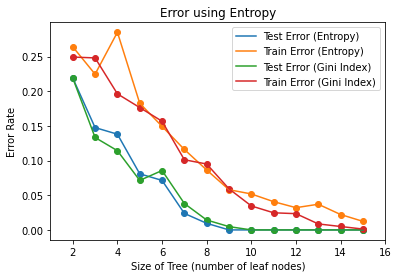

In [ ]:
# Plot the 4 learning curves
depth = np.arange(2,16,1)
plt.scatter(depth, error_test_entropy)
plt.plot(depth,error_test_entropy,label='Test Error (Entropy)')

plt.scatter(depth, error_train_entropy)
plt.plot(depth,error_train_entropy,label='Train Error (Entropy)')

plt.scatter(depth, error_test_gini)
plt.plot(depth,error_test_gini,label='Test Error (Gini Index)')
plt.scatter(depth, error_train_gini)
plt.plot(depth,error_train_gini,label='Train Error (Gini Index)')

plt.legend()
plt.title("Error using Entropy")
plt.ylabel("Error Rate")
plt.xlabel("Size of Tree (number of leaf nodes)")
plt.xlim(1,16)

print(error_test_entropy)
print(error_train_entropy)

[0.21904762 0.13333333 0.11428571 0.07142857 0.08571429 0.03809524
 0.01428571 0.0047619  0.         0.         0.         0.
 0.         0.        ]
[0.24938272 0.24814815 0.1962963  0.17654321 0.15679012 0.10123457
 0.09506173 0.05925926 0.0345679  0.02469136 0.02345679 0.00864198
 0.00493827 0.00123457]


(1.0, 16.0)

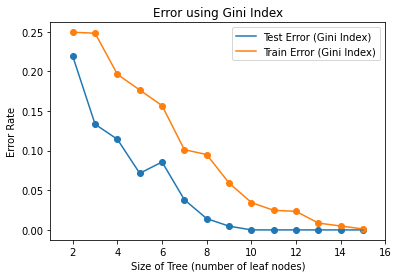

In [ ]:
print(error_test_gini)
print(error_train_gini)

plt.scatter(depth, error_test_gini)
plt.plot(depth,error_test_gini,label='Test Error (Gini Index)')
plt.scatter(depth, error_train_gini)
plt.plot(depth,error_train_gini,label='Train Error (Gini Index)')
plt.legend()
plt.title("Error using Gini Index")
plt.ylabel("Error Rate")
plt.xlabel("Size of Tree (number of leaf nodes)")
plt.xlim(1,16)

➡️ Answer containing your analysis of the trend (or if no trend present, offer a hypotheisis of why) here ⬅️

For both the test and training data and both the entropy and gini index, as the number of leaf nodes increased, the error rate decreased. While this was not the case for all leaf nodes , this was the general trend. Also note that whenever the nodes increases, the data is subjected to overfitting. The opposite happens whenever the nodes decrease significantly, the data is subjected to underfitting. 